# Breast Cancer Classification

In this project I am going to develop a diagnostic tool for breast tumor classification using non invasive methods of analysis. This tool could potentially be used during the first assessment of a breast tumor to decide wheather the patient should be assessed with more invasive methods in order to confirm that the tumor is a cancer, or decide to monitor and cure the tumor as benign. This tool is a machine learning algorithm applied to a dataset of 569 samples and 30 features in order to solve the classification problem of breast tumor classification. A better introduction of the domain with references and previous researches is provided in the project proposal document. 

I will start with an analysis of the dataset and application of multiple preprocessing techniques. When the dataset is ready to be processed, I will split the dataset between training and test set. Then, I will apply a support vector machine for classification and I will test my preprocessing techniques trying to achieve the value of 0.98 value of accuracy which is the highest level that other researchers have achieved on the same dataset on Kaggle. I will calculate also the optimal F1 metric value achievable through the SVM algorithm. 

The last phase will consist in the application of boosting algorithms in order to compare the results and see if it is possible to decrease the error rate of the machine learning. I will conclude with the analysis of the miclassified cases in order to identify possible common characteristics that might make them distinguishable from the others. 

### Loading Libraries and the Dataset

ATTENTION: This project runs only on Python 2.7 32bit.

Please follow the instructions to install the dependencies:
	install http://downloads.sourceforge.net/project/scipy/scipy/0.16.1/scipy-0.16.1-win32-superpack-python2.7.exe?r=https%3A%2F%2Fsourceforge.net%2Fprojects%2Fscipy%2Ffiles%2Fscipy%2F0.16.1%2F&ts=1480456655&use_mirror=pilotfiber

	run "pip install pandas sklearn matplotlib biokit" in order to install dependencies

In [14]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import renders as rs
from biokit.viz import corrplot
%matplotlib inline

try:
    data = pd.read_csv("data.csv")
    data.drop(['id'], axis = 1, inplace = True)
    target = data['diagnosis']
    data.drop(['diagnosis'], axis=1, inplace=True)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

## Dataset Analysis and Preprocessing

In [15]:
print "Breast Cancer dataset has {} samples with {} features each.".format(*data.shape)
display(data.describe())
target = target.replace('B',0).replace('M',1)
#data['diagnosis'] = data['diagnosis'].replace('B',0).replace('M',1)

target_stats = target.value_counts()

print "Number of benign tumor cases: {}, number of malign tumors {}. Percentage of benign: {}%".format(target_stats[0],target_stats[1], 100.0/(target_stats[0]+target_stats[1])*target_stats[0])

Breast Cancer dataset has 569 samples with 30 features each.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of benign tumor cases: 357, number of malign tumors 212. Percentage of benign: 62.7416520211%

We can see that the dataset is unbalanced, which might suggest to use a cutoff value not perfectly centered to 0.5. From maximum value of the first 4 features we can see that the dataset needs to be normalized in order to make sure that all the features have values contained into the same range or at least to make sure that the values are all between -3 and 3.

### Pearson Correlation Coefficient

Now I will calculate the Pearson Correlation Coefficient to understand how the features are related together. The purpose is to hestimate the degree of the lineary dependency between features and understand whether some decomposition algorithms might be able to reduce the number of features and semplify the dataset. 

I will also include the target feature to the dataset to undestand how the other features are related to the target and identify some features that are not useful for our classification problem.

In [16]:
data['diagnosis'] = target
c = corrplot.Corrplot(data)

c.plot()
data.drop(['diagnosis'], axis=1, inplace=True)

Computing correlation

As first observation we notice that a lot of features are strongly related each other. This means that a decomposition algorithm might achieve good results on optimizing the dataset and reducing the number of the features. We also notice that there are 5 features that are lineary independent to the target, which means that those are not useful for our classification problem. I will drop those 5 features as they are not adding relevant information related to the classification.

In [17]:
data.drop(['texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_mean', 'fractal_dimension_se'], axis=1, inplace=True)

### Feature Scaling

We already mentioned that some features have the mean that is in some cases very far from the other features. I am going to apply a MaxMinScaler to the dataset to bring the values of the features in a range between 0 and 1.

In [18]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = DataFrame(data_scaled)
display(data_scaled.describe())

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.106345,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.100421,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.043781,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.077023,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.133044,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see how now the features have a range value from 0 to 1.

### Outliers

In this section I am going to analyse the dataset in order to identify possible outliers in the data that might raise the error of the machine learning. If there are outliers that affect all the features, I will decide whether I want to keep them or not.

In [19]:
from collections import Counter
outliers = []
# For each feature find the data points with extreme high or low values
for feature in data_scaled.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_scaled[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_scaled[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = ((Q3-Q1)*1.5)
    
    outliers.extend(data_scaled[~((data_scaled[feature] >= Q1 - step) & (data_scaled[feature] <= Q3 + step))][feature].keys())
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(data_scaled[~((data_scaled[feature] >= Q1 - step) & (data_scaled[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
display(Counter(outliers).most_common(10))

Data points considered outliers for the feature '0':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
164,0.770931,0.416977,0.748462,0.654295,0.286720,0.291761,0.310216,0.482207,0.374242,0.200145,...,0.714337,0.431770,0.666318,0.545075,0.340950,0.321148,0.315335,0.806186,0.398975,0.241572
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
236,0.768091,0.583700,0.758137,0.647508,0.383317,0.456475,0.456888,0.614811,0.428788,0.342749,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.891065,0.303174,0.208120
339,0.782290,0.492391,0.769194,0.680170,0.489934,0.334090,0.540769,0.700795,0.372222,0.325005,...,0.808965,0.498667,0.756960,0.668698,0.530476,0.233344,0.384904,0.717869,0.202641,0.146530
352,0.887359,0.262090,0.901182,0.791729,0.562156,0.665358,0.789128,0.950795,0.452525,0.319862,...,0.896478,0.308102,0.890931,0.749312,0.540382,0.549534,0.515256,0.947079,0.418884,0.217172


Data points considered outliers for the feature '1':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
219,0.593923,0.769699,0.581922,0.457900,0.285005,0.287160,0.268276,0.329871,0.185859,0.227304,...,0.710423,0.889925,0.646397,0.563262,0.459816,0.371016,0.319089,0.558419,0.226296,0.135380
232,0.200625,0.815015,0.186580,0.103203,0.227228,0.050181,0.011638,0.031978,0.396465,0.040703,...,0.157595,0.793177,0.139599,0.070217,0.189989,0.040322,0.018514,0.103162,0.265326,0.118261
239,0.495953,1.000000,0.481031,0.329629,0.410671,0.338691,0.332006,0.437922,0.378283,0.153938,...,0.518677,0.875533,0.452164,0.300531,0.431420,0.335895,0.258866,0.709966,0.253893,0.196248
259,0.404610,0.806561,0.414000,0.255101,0.484517,0.443286,0.410262,0.417445,0.520707,0.047221,...,0.375667,1.000000,0.377957,0.208858,0.773493,0.513345,0.455511,0.692096,0.383797,0.428703
265,0.650717,0.724045,0.635132,0.541039,0.379706,0.291148,0.320291,0.429722,0.358081,0.384030,...,0.873710,0.936567,0.814732,0.797975,0.455194,0.230045,0.274920,0.570103,0.256850,0.178014
455,0.302854,0.710517,0.294036,0.175483,0.359484,0.168333,0.066050,0.162227,0.159091,0.083035,...,0.253291,0.788646,0.230490,0.127900,0.303969,0.111389,0.055935,0.266770,0.124384,0.142398
562,0.389938,0.707136,0.411927,0.243224,0.470976,0.580701,0.597470,0.468638,0.539394,0.053848,...,0.341160,0.820096,0.389910,0.179365,0.465760,0.741634,0.934505,0.809622,0.497536,0.563164


Data points considered outliers for the feature '2':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
164,0.770931,0.416977,0.748462,0.654295,0.286720,0.291761,0.310216,0.482207,0.374242,0.200145,...,0.714337,0.431770,0.666318,0.545075,0.340950,0.321148,0.315335,0.806186,0.398975,0.241572
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
236,0.768091,0.583700,0.758137,0.647508,0.383317,0.456475,0.456888,0.614811,0.428788,0.342749,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.891065,0.303174,0.208120
339,0.782290,0.492391,0.769194,0.680170,0.489934,0.334090,0.540769,0.700795,0.372222,0.325005,...,0.808965,0.498667,0.756960,0.668698,0.530476,0.233344,0.384904,0.717869,0.202641,0.146530
352,0.887359,0.262090,0.901182,0.791729,0.562156,0.665358,0.789128,0.950795,0.452525,0.319862,...,0.896478,0.308102,0.890931,0.749312,0.540382,0.549534,0.515256,0.947079,0.418884,0.217172


Data points considered outliers for the feature '3':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.210103,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
164,0.770931,0.416977,0.748462,0.654295,0.286720,0.291761,0.310216,0.482207,0.374242,0.200145,...,0.714337,0.431770,0.666318,0.545075,0.340950,0.321148,0.315335,0.806186,0.398975,0.241572
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
236,0.768091,0.583700,0.758137,0.647508,0.383317,0.456475,0.456888,0.614811,0.428788,0.342749,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.891065,0.303174,0.208120
250,0.660656,0.468380,0.657246,0.517709,0.433962,0.433164,0.635426,0.651093,0.578283,0.323194,...,0.627890,0.399254,0.572190,0.448486,0.329723,0.281272,0.558387,0.723368,0.307707,0.153811


Data points considered outliers for the feature '4':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
105,0.290075,0.197836,0.300048,0.164030,0.786946,0.481934,0.485239,0.477187,0.436869,0.101141,...,0.298115,0.276652,0.278849,0.157786,0.759625,0.371210,0.509265,0.682474,0.311847,0.560540
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.107224,...,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,0.460186
520,0.109518,0.141698,0.111741,0.048484,0.762571,0.316300,0.078069,0.120328,0.574242,0.087742,...,0.093917,0.155117,0.086807,0.034752,0.751700,0.176975,0.079840,0.249553,0.417110,0.228125
568,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000,0.266162,0.099294,...,0.054287,0.489072,0.043578,0.020497,0.124084,0.036043,0.000000,0.000000,0.257441,0.100682


Data points considered outliers for the feature '5':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
14,0.319419,0.436253,0.344206,0.184433,0.545906,0.643887,0.498594,0.398857,0.509596,0.036429,...,0.252579,0.532783,0.290801,0.125959,0.620287,0.723006,0.554553,0.758763,0.400355,0.577594
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
181,0.667755,0.570172,0.683505,0.495228,0.554934,0.809214,0.582709,0.743539,0.674242,0.187688,...,0.667022,0.571962,0.627970,0.467902,0.514627,0.709327,0.541534,0.997595,0.499310,0.481175


Data points considered outliers for the feature '6':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.078182,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
112,0.344503,0.336152,0.373437,0.206320,0.232373,0.625483,0.703608,0.387575,0.325253,0.091001,...,0.262184,0.312100,0.281837,0.128736,0.120980,0.380330,0.541773,0.517182,0.164203,0.348682
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
152,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,0.258193,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695


Data points considered outliers for the feature '7':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
352,0.887359,0.262090,0.901182,0.791729,0.562156,0.665358,0.789128,0.950795,0.452525,0.319862,...,0.896478,0.308102,0.890931,0.749312,0.540382,0.549534,0.515256,0.947079,0.418884,0.217172
393,0.692366,0.425093,0.695253,0.535949,0.578406,0.580701,0.658388,0.776342,0.556566,0.185660,...,0.651014,0.445629,0.605558,0.465936,0.521891,0.528189,0.563339,0.832302,0.446087,0.299488
461,0.967343,0.560027,0.988943,1.000000,0.503476,0.550334,0.851687,0.839463,0.505556,0.881948,...,1.000000,0.515725,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.212103,0.126131


Data points considered outliers for the feature '8':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
22,0.395617,0.153872,0.405708,0.237922,0.493545,0.595424,0.486645,0.484891,0.737879,0.118523,...,0.360726,0.188166,0.371981,0.195561,0.447930,0.551183,0.503594,0.822337,0.611473,0.291355
25,0.480808,0.226243,0.498998,0.326278,0.595558,0.638672,0.522259,0.696322,1.000000,0.338403,...,0.509427,0.250000,0.507944,0.313557,0.550287,0.356657,0.307748,0.876289,0.493002,0.333596
60,0.150930,0.174839,0.143459,0.071432,0.548614,0.187811,0.025398,0.064115,0.850000,0.146406,...,0.109925,0.144723,0.096867,0.045075,0.371987,0.069244,0.017316,0.088625,0.392667,0.165027
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
146,0.228075,0.232330,0.243245,0.122375,0.509795,0.461996,0.388707,0.368539,0.817172,0.075394,...,0.206688,0.382729,0.206783,0.099907,0.444628,0.370531,0.359744,0.640893,0.829687,0.314574
150,0.284869,0.374366,0.274480,0.159449,0.549517,0.173333,0.073477,0.131461,0.747475,0.111787,...,0.221629,0.322228,0.201255,0.106051,0.386515,0.080731,0.064792,0.216357,0.321506,0.061065
152,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,0.258193,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778


Data points considered outliers for the feature '9':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
25,0.480808,0.226243,0.498998,0.326278,0.595558,0.638672,0.522259,0.696322,1.000000,0.338403,...,0.509427,0.250000,0.507944,0.313557,0.550287,0.356657,0.307748,0.876289,0.493002,0.333596
27,0.550381,0.356442,0.541151,0.403181,0.377088,0.267530,0.349110,0.384245,0.321717,0.268477,...,0.475987,0.406183,0.445690,0.299302,0.413590,0.178916,0.275240,0.512027,0.152967,0.125738
38,0.379052,0.523842,0.357612,0.235546,0.372303,0.097939,0.056186,0.144085,0.255051,0.399240,...,0.251156,0.351279,0.224762,0.126229,0.149904,0.023304,0.019153,0.099622,0.000000,0.000000
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
77,0.523877,0.217788,0.528022,0.365854,0.486323,0.598798,0.394564,0.536779,0.551515,0.314720,...,0.514408,0.183635,0.496489,0.350177,0.506042,0.520137,0.302396,0.722337,0.430909,0.365735
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057


Data points considered outliers for the feature '10':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
25,0.480808,0.226243,0.498998,0.326278,0.595558,0.638672,0.522259,0.696322,1.000000,0.338403,...,0.509427,0.250000,0.507944,0.313557,0.550287,0.356657,0.307748,0.876289,0.493002,0.333596
38,0.379052,0.523842,0.357612,0.235546,0.372303,0.097939,0.056186,0.144085,0.255051,0.399240,...,0.251156,0.351279,0.224762,0.126229,0.149904,0.023304,0.019153,0.099622,0.000000,0.000000
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
77,0.523877,0.217788,0.528022,0.365854,0.486323,0.598798,0.394564,0.536779,0.551515,0.314720,...,0.514408,0.183635,0.496489,0.350177,0.506042,0.520137,0.302396,0.722337,0.430909,0.365735
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305


Data points considered outliers for the feature '11':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
18,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,0.234184,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.210103,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
24,0.457617,0.394657,0.457536,0.322842,0.536878,0.387461,0.357310,0.455765,0.472222,0.251783,...,0.659196,0.520789,0.630460,0.498869,0.721984,0.320662,0.375000,0.719931,0.403706,0.266299
25,0.480808,0.226243,0.498998,0.326278,0.595558,0.638672,0.522259,0.696322,1.000000,0.338403,...,0.509427,0.250000,0.507944,0.313557,0.550287,0.356657,0.307748,0.876289,0.493002,0.333596
27,0.550381,0.356442,0.541151,0.403181,0.377088,0.267530,0.349110,0.384245,0.321717,0.268477,...,0.475987,0.406183,0.445690,0.299302,0.413590,0.178916,0.275240,0.512027,0.152967,0.125738
30,0.551328,0.520798,0.559809,0.400636,0.485420,0.519355,0.543346,0.618290,0.567172,0.260438,...,0.541444,0.586087,0.548284,0.364923,0.514627,0.386539,0.489856,0.635052,0.370392,0.280598


Data points considered outliers for the feature '12':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
62,0.344030,0.420697,0.363693,0.213022,0.471879,0.556469,0.500234,0.430070,0.448990,0.214412,...,0.346496,0.466151,0.342099,0.190302,0.613023,0.579610,0.552875,0.613402,0.252119,0.381477
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.078182,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.150172,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
112,0.344503,0.336152,0.373437,0.206320,0.232373,0.625483,0.703608,0.387575,0.325253,0.091001,...,0.262184,0.312100,0.281837,0.128736,0.120980,0.380330,0.541773,0.517182,0.164203,0.348682


Data points considered outliers for the feature '13':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.078182,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
112,0.344503,0.336152,0.373437,0.206320,0.232373,0.625483,0.703608,0.387575,0.325253,0.091001,...,0.262184,0.312100,0.281837,0.128736,0.120980,0.380330,0.541773,0.517182,0.164203,0.348682
116,0.093189,0.204599,0.103310,0.043139,0.379074,0.321821,0.217034,0.114712,0.123737,0.073040,...,0.052793,0.134595,0.064396,0.020842,0.308591,0.155825,0.123323,0.132165,0.017150,0.145481
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
152,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,0.258193,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
176,0.138341,0.282381,0.143805,0.067402,0.400469,0.337464,0.306232,0.184692,0.307576,0.115734,...,0.118463,0.329691,0.112854,0.050383,0.389157,0.259734,0.278435,0.340550,0.206781,0.401154


Data points considered outliers for the feature '14':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
12,0.576885,0.510315,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.675253,0.305631,...,0.463536,0.477612,0.504457,0.281852,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.078182,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.297012,...,0.549271,0.525053,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536
138,0.377159,0.265810,0.366664,0.226766,0.578406,0.340838,0.360590,0.428628,0.453030,0.428934,...,0.377801,0.250800,0.353553,0.193227,0.461798,0.183475,0.267971,0.572852,0.364479,0.107766
152,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,0.258193,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
161,0.577831,0.210687,0.570175,0.429905,0.309741,0.304030,0.279522,0.480467,0.343939,0.321745,...,0.501601,0.154318,0.479058,0.321913,0.272271,0.169116,0.180831,0.610653,0.173073,0.048996
210,0.643618,0.420358,0.628222,0.486320,0.345491,0.354027,0.384255,0.475199,0.356061,0.271085,...,0.544646,0.421642,0.537328,0.361483,0.307931,0.256823,0.308387,0.659794,0.264932,0.023678
213,0.494060,0.536016,0.488632,0.341251,0.433059,0.292068,0.394096,0.327883,0.125253,0.151403,...,0.360726,0.427772,0.348573,0.205417,0.350855,0.147481,0.223882,0.377663,0.007491,0.086187
258,0.410762,0.456206,0.458918,0.267232,0.526045,0.895712,0.744142,0.684394,0.724747,0.427485,...,0.424048,0.522921,0.464615,0.255800,0.523212,0.475313,0.493690,0.846048,0.337473,0.307359


Data points considered outliers for the feature '15':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.210103,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
164,0.770931,0.416977,0.748462,0.654295,0.286720,0.291761,0.310216,0.482207,0.374242,0.200145,...,0.714337,0.431770,0.666318,0.545075,0.340950,0.321148,0.315335,0.806186,0.398975,0.241572
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
219,0.593923,0.769699,0.581922,0.457900,0.285005,0.287160,0.268276,0.329871,0.185859,0.227304,...,0.710423,0.889925,0.646397,0.563262,0.459816,0.371016,0.319089,0.558419,0.226296,0.135380
236,0.768091,0.583700,0.758137,0.647508,0.383317,0.456475,0.456888,0.614811,0.428788,0.342749,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.891065,0.303174,0.208120
265,0.650717,0.724045,0.635132,0.541039,0.379706,0.291148,0.320291,0.429722,0.358081,0.384030,...,0.873710,0.936567,0.814732,0.797975,0.455194,0.230045,0.274920,0.570103,0.256850,0.178014
272,0.698992,0.381468,0.715293,0.571580,0.373567,0.542053,0.514292,0.540755,0.333838,0.382220,...,0.720740,0.430704,0.724588,0.540405,0.370006,0.431945,0.463818,0.632646,0.249951,0.219992


Data points considered outliers for the feature '16':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
219,0.593923,0.769699,0.581922,0.457900,0.285005,0.287160,0.268276,0.329871,0.185859,0.227304,...,0.710423,0.889925,0.646397,0.563262,0.459816,0.371016,0.319089,0.558419,0.226296,0.135380
239,0.495953,1.000000,0.481031,0.329629,0.410671,0.338691,0.332006,0.437922,0.378283,0.153938,...,0.518677,0.875533,0.452164,0.300531,0.431420,0.335895,0.258866,0.709966,0.253893,0.196248
259,0.404610,0.806561,0.414000,0.255101,0.484517,0.443286,0.410262,0.417445,0.520707,0.047221,...,0.375667,1.000000,0.377957,0.208858,0.773493,0.513345,0.455511,0.692096,0.383797,0.428703
265,0.650717,0.724045,0.635132,0.541039,0.379706,0.291148,0.320291,0.429722,0.358081,0.384030,...,0.873710,0.936567,0.814732,0.797975,0.455194,0.230045,0.274920,0.570103,0.256850,0.178014
562,0.389938,0.707136,0.411927,0.243224,0.470976,0.580701,0.597470,0.468638,0.539394,0.053848,...,0.341160,0.820096,0.389910,0.179365,0.465760,0.741634,0.934505,0.809622,0.497536,0.563164


Data points considered outliers for the feature '17':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.210103,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.262394,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
212,1.000000,0.296246,1.000000,0.999152,0.555836,0.405558,0.750000,0.792744,0.296970,1.000000,...,0.717894,0.171908,0.687733,0.568669,0.284158,0.120606,0.255671,0.548110,0.016361,0.001377
236,0.768091,0.583700,0.758137,0.647508,0.383317,0.456475,0.456888,0.614811,0.428788,0.342749,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.891065,0.303174,0.208120
265,0.650717,0.724045,0.635132,0.541039,0.379706,0.291148,0.320291,0.429722,0.358081,0.384030,...,0.873710,0.936567,0.814732,0.797975,0.455194,0.230045,0.274920,0.570103,0.256850,0.178014
272,0.698992,0.381468,0.715293,0.571580,0.373567,0.542053,0.514292,0.540755,0.333838,0.382220,...,0.720740,0.430704,0.724588,0.540405,0.370006,0.431945,0.463818,0.632646,0.249951,0.219992
339,0.782290,0.492391,0.769194,0.680170,0.489934,0.334090,0.540769,0.700795,0.372222,0.325005,...,0.808965,0.498667,0.756960,0.668698,0.530476,0.233344,0.384904,0.717869,0.202641,0.146530
352,0.887359,0.262090,0.901182,0.791729,0.562156,0.665358,0.789128,0.950795,0.452525,0.319862,...,0.896478,0.308102,0.890931,0.749312,0.540382,0.549534,0.515256,0.947079,0.418884,0.217172


Data points considered outliers for the feature '18':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
18,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,0.234184,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.210103,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
24,0.457617,0.394657,0.457536,0.322842,0.536878,0.387461,0.357310,0.455765,0.472222,0.251783,...,0.659196,0.520789,0.630460,0.498869,0.721984,0.320662,0.375000,0.719931,0.403706,0.266299
56,0.578778,0.299628,0.564647,0.427784,0.475490,0.329182,0.309981,0.447018,0.432828,0.223067,...,0.647812,0.429638,0.596095,0.481665,0.602457,0.314162,0.309824,0.718557,0.388725,0.182999
82,0.863221,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
122,0.817313,0.354751,0.845899,0.686108,0.831182,0.819950,1.000000,1.000000,0.805556,0.506066,...,0.643543,0.319030,0.649883,0.463970,0.650003,0.385278,0.463498,0.772509,0.326631,0.164305
162,0.596763,0.285424,0.600580,0.454083,0.535975,0.451567,0.587629,0.639165,0.488384,0.226290,...,0.668801,0.382996,0.620001,0.503048,0.479628,0.346664,0.543930,0.772165,0.409620,0.243933


Data points considered outliers for the feature '19':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
41,0.187846,0.393642,0.194251,0.096543,0.632572,0.314153,0.244611,0.281759,0.421717,0.045301,...,0.174671,0.621535,0.183326,0.080810,0.790662,0.235284,0.321326,0.489347,0.275774,0.269054
192,0.129632,0.287792,0.117062,0.061336,0.152298,0.012453,0.000000,0.000000,0.299495,0.087778,...,0.072501,0.234808,0.058967,0.029149,0.000000,0.000000,0.000000,0.000000,0.067810,0.069198
203,0.323205,0.474806,0.330108,0.192704,0.719238,0.482854,0.365042,0.456064,0.601515,0.164150,...,0.400925,0.795043,0.388914,0.237859,1.000000,0.478903,0.371086,0.691753,0.565149,0.351305
379,0.193999,0.308421,0.203925,0.092513,0.622642,0.601251,0.395736,0.316451,0.573737,0.036176,...,0.188901,0.554371,0.205937,0.079360,0.972264,0.883478,0.671086,0.867354,0.510349,0.559229
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.107224,...,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,0.460186
505,0.127550,0.115996,0.140488,0.054719,0.657850,0.616588,0.278351,0.349801,0.503535,0.058990,...,0.094984,0.160448,0.094925,0.035121,0.854718,0.328909,0.232668,0.369416,0.252908,0.533648


Data points considered outliers for the feature '20':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
14,0.319419,0.436253,0.344206,0.184433,0.545906,0.643887,0.498594,0.398857,0.509596,0.036429,...,0.252579,0.532783,0.290801,0.125959,0.620287,0.723006,0.554553,0.758763,0.400355,0.577594
15,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.093609,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
26,0.359648,0.399729,0.370534,0.212641,0.476393,0.513527,0.333880,0.436531,0.602020,0.051783,...,0.344717,0.564765,0.358534,0.174916,0.537080,0.618030,0.442412,0.928179,0.532032,0.475272
33,0.581618,0.566791,0.581231,0.432025,0.373567,0.467824,0.388238,0.377386,0.400505,0.160891,...,0.577019,0.503198,0.552767,0.400069,0.526514,0.612888,0.486502,0.613402,0.415336,0.375574
42,0.572152,0.510653,0.583996,0.407423,0.344678,0.612294,0.493674,0.495080,0.631313,0.314901,...,0.574884,0.563699,0.632452,0.360254,0.353497,0.695744,0.578435,0.856701,0.612064,0.319822
72,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.173529,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.690893,0.524441,0.652577,0.344569,0.517250
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057


Data points considered outliers for the feature '21':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.078182,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681
108,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,0.399602,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
152,0.130153,0.190396,0.138138,0.066469,0.492642,0.431017,0.962512,0.390507,0.751515,0.258193,...,0.109925,0.199094,0.102744,0.047999,0.383213,0.242464,0.656230,0.539863,0.304159,0.464778
190,0.342610,0.453500,0.349527,0.197837,0.495351,0.680694,0.464152,0.328926,0.668687,0.063190,...,0.277837,0.670576,0.278849,0.141860,0.542363,0.878433,0.677955,0.608935,0.709836,0.587433
202,0.771878,0.573554,0.795453,0.653871,0.554934,0.579780,0.825445,0.805169,0.575758,0.160203,...,0.611526,0.550640,0.630460,0.442587,0.544344,0.377808,0.630351,0.939175,0.321900,0.213695
252,0.603389,0.341901,0.600580,0.450689,0.483615,0.507699,0.566307,0.484095,0.339899,0.237045,...,0.617218,0.361674,0.544798,0.429562,0.659248,0.551280,0.678035,0.861512,0.233392,0.489702
379,0.193999,0.308421,0.203925,0.092513,0.622642,0.601251,0.395736,0.316451,0.573737,0.036176,...,0.188901,0.554371,0.205937,0.079360,0.972264,0.883478,0.671086,0.867354,0.510349,0.559229
400,0.517251,0.382482,0.557045,0.360764,0.635280,0.730691,0.747188,0.595427,0.531818,0.105559,...,0.457844,0.420043,0.493999,0.274971,0.766889,0.547593,0.721565,0.674914,0.331165,0.424767
430,0.374793,0.433548,0.402944,0.229692,0.422858,0.623029,0.640347,0.482654,0.495455,0.051240,...,0.299538,0.414446,0.373475,0.159138,0.467080,0.661398,0.720367,0.850515,0.256456,0.396563


Data points considered outliers for the feature '22':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24


Data points considered outliers for the feature '23':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.070541,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
15,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.093609,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
22,0.395617,0.153872,0.405708,0.237922,0.493545,0.595424,0.486645,0.484891,0.737879,0.118523,...,0.360726,0.188166,0.371981,0.195561,0.447930,0.551183,0.503594,0.822337,0.611473,0.291355
26,0.359648,0.399729,0.370534,0.212641,0.476393,0.513527,0.333880,0.436531,0.602020,0.051783,...,0.344717,0.564765,0.358534,0.174916,0.537080,0.618030,0.442412,0.928179,0.532032,0.475272
31,0.229968,0.304024,0.235920,0.126023,0.526045,0.405558,0.285380,0.257555,0.626768,0.134347,...,0.316258,0.429104,0.343593,0.172901,0.611041,0.533816,0.555591,0.531271,0.630002,0.558573
34,0.433007,0.276294,0.436805,0.281527,0.463754,0.418747,0.317245,0.385288,0.473737,0.080572,...,0.436855,0.406183,0.409831,0.264402,0.484911,0.536630,0.421246,0.640550,0.533215,0.447724
35,0.461877,0.401759,0.458227,0.307953,0.392435,0.350347,0.315839,0.299105,0.422222,0.126743,...,0.429740,0.453092,0.413815,0.256538,0.562174,0.345597,0.432029,0.623024,0.650108,0.205234


Data points considered outliers for the feature '24':

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.080753,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.067391,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
14,0.319419,0.436253,0.344206,0.184433,0.545906,0.643887,0.498594,0.398857,0.509596,0.036429,...,0.252579,0.532783,0.290801,0.125959,0.620287,0.723006,0.554553,0.758763,0.400355,0.577594
15,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.093609,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
26,0.359648,0.399729,0.370534,0.212641,0.476393,0.513527,0.333880,0.436531,0.602020,0.051783,...,0.344717,0.564765,0.358534,0.174916,0.537080,0.618030,0.442412,0.928179,0.532032,0.475272
31,0.229968,0.304024,0.235920,0.126023,0.526045,0.405558,0.285380,0.257555,0.626768,0.134347,...,0.316258,0.429104,0.343593,0.172901,0.611041,0.533816,0.555591,0.531271,0.630002,0.558573
34,0.433007,0.276294,0.436805,0.281527,0.463754,0.418747,0.317245,0.385288,0.473737,0.080572,...,0.436855,0.406183,0.409831,0.264402,0.484911,0.536630,0.421246,0.640550,0.533215,0.447724
72,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.173529,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.690893,0.524441,0.652577,0.344569,0.517250
105,0.290075,0.197836,0.300048,0.164030,0.786946,0.481934,0.485239,0.477187,0.436869,0.101141,...,0.298115,0.276652,0.278849,0.157786,0.759625,0.371210,0.509265,0.682474,0.311847,0.560540


[(108, 17),
 (122, 14),
 (82, 12),
 (352, 12),
 (461, 12),
 (78, 11),
 (212, 11),
 (521, 9),
 (180, 9),
 (236, 9)]

We can see that the outliers detected are not affecting more than 17 features. There is no reason to eliminate those instances but we will keep those in mind in case our machine learning model will present an error rate.

### Principal Component Analysis

I initially used Independent Component Analysis to decompose the database. Surprisingly, I was able get a higher accuracy and higher F1 score using PCA. Reading some articles on internet, I realized ICA is more used to decompose signals. ICA is more appropriate for applications such as image or voice recognition, especially when there is noise in the data and the features are not completely independent. In this case the dataset has a consistent number of features that are strongly dependent among each other, therefore an algorithm of dimensionality reduction which aims to minimize the information loss through the projection of point to other vectors seems more appropriate. 

Dimension 1     0.5950
Dimension 2     0.7483
Dimension 3     0.8228
Dimension 4     0.8730
Dimension 5     0.9077
Dimension 6     0.9346
Dimension 7     0.9499
Dimension 8     0.9608
Dimension 9     0.9708
Dimension 10    0.9776
Dimension 11    0.9823
Dimension 12    0.9858
Dimension 13    0.9891
Dimension 14    0.9918
Name: Explained Variance, dtype: float64

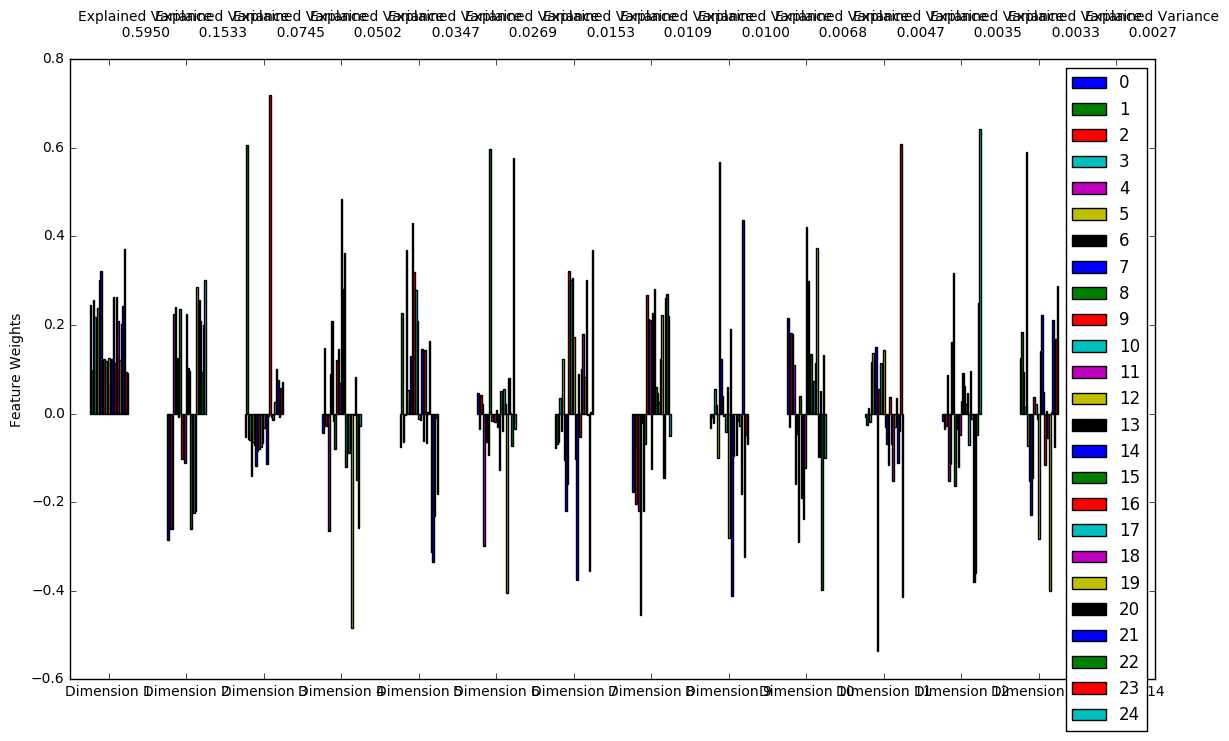

In [20]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=14)
pca.fit(data_scaled)

# TODO: Apply a PCA transformation to the sample log-data
pca_data_14 = pca.transform(data_scaled)

# Generate PCA results plot
pca_results = rs.pca_results(data_scaled, pca)
print pca_results['Explained Variance'].cumsum()

I was able to achieve 0.9851 of eplained variance with 14 features. The output shows that with only the first 6 features we obtain the 0.9346 of the variance. The graph also shows that while the 6th feature is adding 0.269 of explained variance, the features after the 6th feature the explained variance drops. However, I did multiple tests with the SVM starting with the PCA dataset with 14 features, then 6, 7, 8 and 20 features. The least complicated dataset which performs best on the SVM is the PCA dataset with 8 features. The 8th feature provides an increase of almost 3% in accuracy. For this reason I decided to use 8 PCA features.

In [21]:
pca = PCA(n_components=8)
pca.fit(data_scaled)

# TODO: Apply a PCA transformation to the sample log-data
pca_dataset = pca.transform(data_scaled)

## Support Vector Machine

As first step, I try to run support vector machine to test and confirm the performances obtained by other researchers on kaggle. Some of the kernels published on Kaggle are able to reach 98% of accuracy using SVC. The first objective of this section is to compare those results with our preprocessed dataset. If we obtain performances lower than expected, we can tweak our preprocessing methods to achieve at least the same level of accuracy. When this verification step is done, I will recreate the SVM and fit it based on the F1 metric. This will give us an understanding of the F1 values we are able to achieve with SVM. This value will be used later as comparison with the results obtained by boosting algorithms. 

### Shuffling and Splitting the Dataset

In [22]:
""" Shuffles and splits data into 75% training and 25% testing subsets,
        then returns the training and testing subsets. """
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle and split the data
X_train = None
y_train = None
X_test = None
y_test = None

X, y = shuffle(pca_dataset, target, random_state=35)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Metrics to use later on
from sklearn.metrics import accuracy_score,f1_score, make_scorer

### SVM Implementation and Performances 

In [23]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

classifier = svm.SVC()

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':range(1, 100)}
scorer = make_scorer(accuracy_score)

clf = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=8, scoring=scorer, cv=KFold())
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print "Accuracy score: {}".format(accuracy_score(y_test,predictions))

######## F1 score #######
# I retrain a new model to avoid suboptimal results

classifier = svm.SVC()

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':range(1, 100)}
scorer = make_scorer(f1_score)

clf = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=8, scoring=scorer, cv=KFold())
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print "F1 score: {}".format(f1_score(y_test,predictions))

Accuracy score: 0.979020979021

F1 score: 0.963855421687

We achieved an F1 score of 0.96 and an accuracy of 0.98. This gives us an F1 score as reference for my boosting model. I will be able to compare my bosting models with this F1 score in order to understand how they perform compared to the SVM. The next step is to apply boosting to the dataset and see if we get any improvement on the F1 score.

### AdaBoosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NearestNeighbors

classifier = AdaBoostClassifier()
parameters = {'learning_rate': [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
              'base_estimator': (None, svm.SVC(), NearestNeighbors())}

GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=8, scoring=scorer, cv=KFold())

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print "F1 score: {}".format(f1_score(y_test,predictions))

F1 score: 0.963855421687

Apparently boosting can reach exactly the same results as the SVM. This means that the error doesn't depend on overfitting issues or it is not possible to reach better performances with this quantity of data. As final step I will be analysing the misclassified samples in order to understand whether there might be a correlation among them that might enable a machine learning to distinguish them.

## Error Analysis

In this phase I am going to print out the indexes of the samples that were misclassified, checking wether the samples are in the outliers set identified earlier. 

In [25]:
count = 0
misclassified_fp = pd.DataFrame(columns=('Dimension 1', 'Dimension 2'))
misclassified_fn = pd.DataFrame(columns=('Dimension 1', 'Dimension 2'))
for p, t in zip(predictions, y_test):
    if ( p != t ):
        if ( y_test.keys()[count] in outliers ):
            print "Outlier of at least one dimension: {}".format(y_test.keys()[count])
        else:
            print y_test.keys()[count]
        if (p==1 and t==0):
            misclassified_fp.loc[count] = pca_dataset[y_test.keys()[count],:2]
        elif (p==0 and t==1):
            misclassified_fn.loc[count] = pca_dataset[y_test.keys()[count],:2]
    count+=1
    
predictions = clf.predict(X_train)
count = 0
for p, t in zip( predictions, y_train ):
    if ( p != t ):
        if ( y_train.keys()[count] in outliers ):
            print "Outlier of at least one dimension: {}".format(y_train.keys()[count])
        else:
            print y_train.keys()[count]
        if (p==1 and t==0):
            misclassified_fp.loc[count] = pca_dataset[y_train.keys()[count],:2]
        elif (p==0 and t==1):
            misclassified_fn.loc[count] = pca_dataset[y_train.keys()[count],:2]
    count+=1

40

297

Outlier of at least one dimension: 38

135

73

263

413

541

As we can see, most of the misclassified samples are not part of the outliers group. The next code section will draw a graphical representation of the samples, the misclassified samples divided between false positives and false negative.

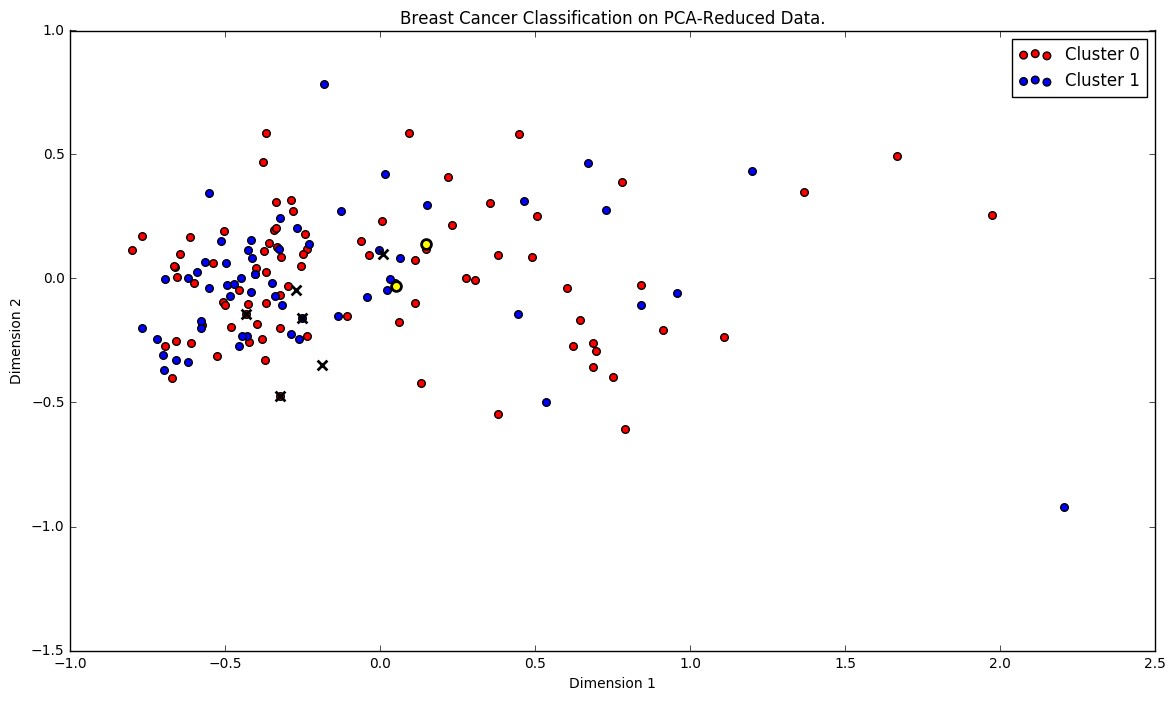

In [26]:
import matplotlib.cm as cm
predictions = pd.DataFrame(predictions, columns = ['Prediction'])
data_bidim = pd.DataFrame(X_test[:,:2], columns = ['Dimension 1', 'Dimension 2'])
plot_data = pd.concat([predictions, data_bidim], axis = 1)

# Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))

# Color map
cmap = cm.get_cmap('gist_rainbow')

colors = ['red','blue']

# Color the points based on assigned class
for i, cluster in plot_data.groupby('Prediction'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = colors[i], label = 'Cluster %i'%(i), s=30);

# Plot misclassified samples
for i, c in enumerate(misclassified_fp.values):
    ax.scatter(x = c[0], y = c[1], color = 'yellow', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=50);

for i, c in enumerate(misclassified_fn.values):
    ax.scatter(x = c[0], y = c[1], color = 'black', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'x', s=50);
 


# Set plot title
ax.set_title("Breast Cancer Classification on PCA-Reduced Data.");

## Conclusions

As we can see, the misclassified samples are not linearly separable and they are spread out among the other samples. We can also notice that there are more false negatives than false positives, which means that there is the possibility that a cancer is identified as benign tumor. This error rate is probably due to the variability of the data. It is probably possible to increase those performances adding more samples to the dataset. It looks appropriate to output the probability of a cancer with the final classification. If the sample it is trying to predict is very close to the cut off value, the doctor can decide to execute more invasive exams in order to confirm the classification.